# Car Evaluation Data Set

The model evaluates cars according to the following concept structure

It is classification Problem

Importing the Libraries

In [1]:
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
# linear algebra
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing the Dataset

In [2]:
car_df = pd.read_csv("C:\\Users\\PUNEET SINGH\\car_evaluation.csv",header=None,names=
                    ['Price', 'Maintenance Cost', 'Number of Doors', 'Capacity', 'Size of Luggage Boot', 'safety', 'Decision'])
car_df.head()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Data Description


Features:

Price: vhigh, high, med, low.

Maintenance Cost: vhigh, high, med, low.

Number of Doors: 2, 3, 4, 5more.

Capacity: 2, 4, more.

Size of Luggage Boot: small, med, big.

safety: low, med, high.

Target


buying: unacc, acc, good, vgood.

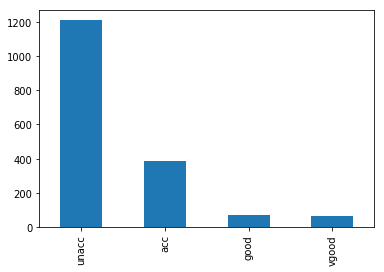

In [3]:
# Decision is the Target Varible of the dataset
# Checking the value count of the Target Variable
car_df['Decision'].value_counts().plot.bar()

In [4]:
# unn means Unacceptable
# acc means Acceptable

In [5]:
# Summary of the data
car_df.describe()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,2,2,small,med,unacc
freq,432,432,432,576,576,576,1210


In [6]:
# From the Summary we can see
# There is no null values in the dataset
# Unique values in the Features of the data

In [7]:
# Checking the Info of the data
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Price                   1728 non-null object
Maintenance Cost        1728 non-null object
Number of Doors         1728 non-null object
Capacity                1728 non-null object
Size of Luggage Boot    1728 non-null object
safety                  1728 non-null object
Decision                1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


Visualization of the dataset

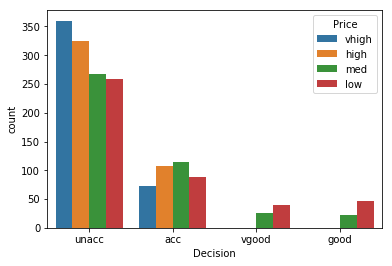

In [8]:
sns.countplot(x='Decision',hue='Price',data=car_df)

In [9]:
# It is clear that in very high price range also unacc has tha maximum count.

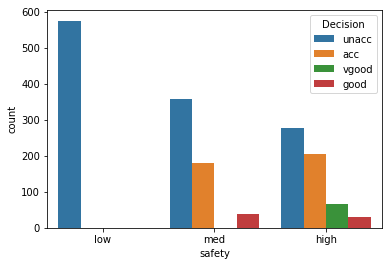

In [10]:
sns.countplot(x='safety',hue='Decision',data=car_df)

Label Encoding of the Categorical Data into Binary form 

In [11]:
# Converting the Target Variable values into Binary form manually
# As the Target variable contains four unique values 
# So Encoding (unn,acc==0) and (good,vgood==1) for better Accuracy
car_df.Decision.replace(('unacc','acc','good','vgood'), (0, 0, 1, 1), inplace = True)
car_df['Decision'].value_counts()

0    1594
1     134
Name: Decision, dtype: int64

In [12]:
# Checking the value counts of fearture 'Number of Doors'
car_df['Number of Doors'].value_counts()

2        432
5more    432
3        432
4        432
Name: Number of Doors, dtype: int64

In [13]:
# We can see in the that one of the value is 5more 
car_df['Number of Doors'].replace(('5more'),('5'),inplace=True)
car_df['Number of Doors'].value_counts()

2    432
5    432
3    432
4    432
Name: Number of Doors, dtype: int64

In [14]:
# Checking the value count of feature Capacity
car_df['Capacity'].value_counts()

2       576
more    576
4       576
Name: Capacity, dtype: int64

In [15]:
# One of the value is 'more'
car_df.Capacity.replace(('more'),('3'),inplace=True)
car_df['Capacity'].value_counts()

2    576
3    576
4    576
Name: Capacity, dtype: int64

In [16]:
car_df['Size of Luggage Boot'].value_counts().sort_index()

big      576
med      576
small    576
Name: Size of Luggage Boot, dtype: int64

In [17]:
# Checking the value count feature 'Size of Luggage Boot'
car_df['Size of Luggage Boot'].replace(('small', 'med', 'big'), (0, 1, 2), inplace = True)
car_df['Size of Luggage Boot'].value_counts()

2    576
1    576
0    576
Name: Size of Luggage Boot, dtype: int64

In [18]:
car_df['safety'].value_counts().sort_index()

high    576
low     576
med     576
Name: safety, dtype: int64

In [19]:
# Checking the value count of feature 'safety'
car_df['safety'].replace(('low', 'med', 'high'), (0, 1, 2), inplace = True)
car_df['safety'].value_counts()

2    576
1    576
0    576
Name: safety, dtype: int64

In [20]:
car_df['Price'].value_counts().sort_index()

high     432
low      432
med      432
vhigh    432
Name: Price, dtype: int64

In [21]:
# label Encoding

car_df['Price'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
car_df['Price'].value_counts()

3    432
2    432
1    432
0    432
Name: Price, dtype: int64

In [22]:
car_df.head()

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,safety,Decision
0,3,vhigh,2,2,0,0,0
1,3,vhigh,2,2,0,1,0
2,3,vhigh,2,2,0,2,0
3,3,vhigh,2,2,1,0,0
4,3,vhigh,2,2,1,1,0


In [23]:
car_df['Maintenance Cost'].value_counts().sort_index()

high     432
low      432
med      432
vhigh    432
Name: Maintenance Cost, dtype: int64

In [24]:
# label Encoding

car_df['Maintenance Cost'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)

car_df['Maintenance Cost'].value_counts()

3    432
2    432
1    432
0    432
Name: Maintenance Cost, dtype: int64

In [25]:
# Checking the datatype
car_df.dtypes

Price                    int64
Maintenance Cost         int64
Number of Doors         object
Capacity                object
Size of Luggage Boot     int64
safety                   int64
Decision                 int64
dtype: object

In [26]:
car_df['Number of Doors']=car_df['Number of Doors'].astype("int")
car_df['Capacity']=car_df['Capacity'].astype("int")

In [27]:
# Splitting the data into Independent and dependent variables 
X = car_df.drop('Decision',axis=1)
y = car_df['Decision']

In [28]:
# splitting the dataset into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0,stratify=y)
# Using Stratify to make the train and test set balanced

print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("shape of x_test: ", X_test.shape)
print("shape of y_test: ", y_test.shape)

Shape of x_train:  (1468, 6)
Shape of y_train:  (1468,)
shape of x_test:  (260, 6)
shape of y_test:  (260,)


In [29]:
# Standardization of the data using Standard Scaler
# Importing the Library
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

MODELS

In [30]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# creating a model
model = LogisticRegression(C = 1)
# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the values for x-test
y_pred = model.predict(X_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))
print("classification report :\n",classification_report(y_test, y_pred))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.9618528610354223
Testing Accuracy:  0.9653846153846154
classification report :
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       240
           1       0.79      0.75      0.77        20

   micro avg       0.97      0.97      0.97       260
   macro avg       0.88      0.87      0.88       260
weighted avg       0.96      0.97      0.96       260

[[236   4]
 [  5  15]]


In [31]:
# Logistic Regression model has predicted EXCELLENT with accuracy of 96.5% 
# But as the data is not balanced so we can consider other measure metrics
# Precision , recall and F1 score can be considered for this data

In [32]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# creating a model
model = DecisionTreeClassifier(max_depth = 5)
# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the values for x-test
y_pred = model.predict(X_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))
print("classification report :\n",classification_report(y_test, y_pred))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.9638964577656676
Testing Accuracy:  0.95
classification report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       240
           1       0.77      0.50      0.61        20

   micro avg       0.95      0.95      0.95       260
   macro avg       0.86      0.74      0.79       260
weighted avg       0.94      0.95      0.95       260

[[237   3]
 [ 10  10]]


In [33]:
# Decision Tree model is predicting better than Logistic Regression model

In [34]:
# Importing the bagging algorithm model
# Using the Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# creating a model
model = RandomForestClassifier()
# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the values for x-test
y_pred = model.predict(X_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))
print("classification report :\n",classification_report(y_test, y_pred))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.9993188010899182
Testing Accuracy:  0.9807692307692307
classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       240
           1       0.86      0.90      0.88        20

   micro avg       0.98      0.98      0.98       260
   macro avg       0.92      0.94      0.93       260
weighted avg       0.98      0.98      0.98       260

[[237   3]
 [  2  18]]


In [35]:
# In all the models
# Bagging algortithm Random Forest has predicted best

In [36]:
# Using the BOOSTING algorthim 
# Using the ADaboost model
# Importing the Library
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
# creating a model
model = AdaBoostClassifier()
# feeding the training data into the model
model.fit(X_train, y_train)
# predicting the values for x-test
y_pred = model.predict(X_test)

# finding the training and testing accuracy
print("Training Accuracy: ",model.score(X_train, y_train))
print("Testing Accuracy: ", accuracy_score(y_test, y_pred))
print("classification report :\n",classification_report(y_test, y_pred))

# printing the confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy:  0.9918256130790191
Testing Accuracy:  0.9923076923076923
classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       240
           1       0.91      1.00      0.95        20

   micro avg       0.99      0.99      0.99       260
   macro avg       0.95      1.00      0.97       260
weighted avg       0.99      0.99      0.99       260

[[238   2]
 [  0  20]]


Logistic Reression has predicted the accuracy of 96.53 % , Decision tree has predicted the accuracy of 95%
and Random forest and ADAboost classifier has predicted with 98% and 99% which is excellent.
Among all the models Adaboost classifier has predicted the best accuracy.

In [37]:
# Saving the BEST MODEL thorugh Pickle
# Importing Pickle
import pickle
filehandler = open("Project_37.obj","wb")
# saving the model in pickel string
saved_rf_model = pickle.dump(AdaBoostClassifier,filehandler)
filehandler.close()